In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Get the stock quote (hardcoded 2016 for now, but can be dynamically get the IPO date of the chosen stock)
start = '2016-01-01'
end = datetime.today().strftime('%Y-%m-%d')
print(end)
# df = data.DataReader('AAPL', 'yahoo', start, end)
df = yf.download('AAPL', start, end)
df

2023-04-22
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.074743,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.471445,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.012117,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.040897,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.157440,283192000
...,...,...,...,...,...,...
2023-04-17,165.089996,165.389999,164.029999,165.229996,165.229996,41516200
2023-04-18,166.100006,167.410004,165.649994,166.470001,166.470001,49923000
2023-04-19,165.800003,168.160004,165.539993,167.630005,167.630005,47720200


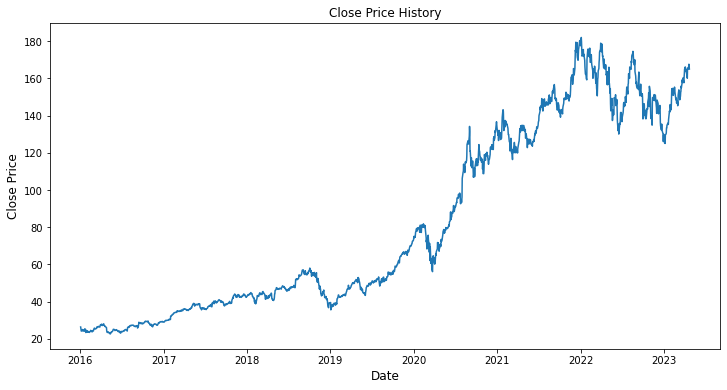

In [3]:
#Visualize the closing price
plt.figure(figsize = (12,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.show()

In [4]:
# 100 day moving average
ma100 = df.Close.rolling(100).mean()
ma100

Date
2016-01-04         NaN
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
                ...   
2023-04-17    147.1352
2023-04-18    147.3198
2023-04-19    147.4943
2023-04-20    147.6501
2023-04-21    147.8192
Name: Close, Length: 1838, dtype: float64

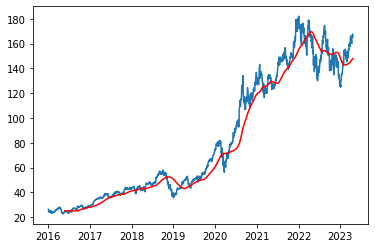

In [5]:
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.show()

In [6]:
# 200 day moving average
ma200 = df.Close.rolling(200).mean()
ma200

Date
2016-01-04          NaN
2016-01-05          NaN
2016-01-06          NaN
2016-01-07          NaN
2016-01-08          NaN
                ...    
2023-04-17    149.86135
2023-04-18    150.01010
2023-04-19    150.15360
2023-04-20    150.27905
2023-04-21    150.38955
Name: Close, Length: 1838, dtype: float64

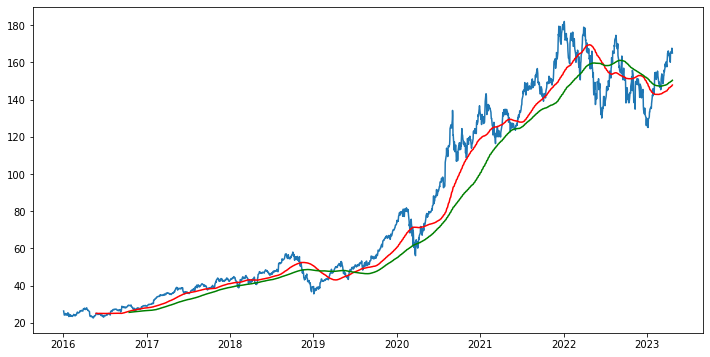

In [7]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.show()

In [8]:
# Get the number of rows and columns in the data set
df.shape

(1838, 6)

In [9]:
# Data Values
dataset = df.filter(['Close']).values

# Splitting Data into Training and Testing
training_data_len = math.ceil(int(len(df) * 0.8))
data_training = pd.DataFrame(df['Close'][0:training_data_len]) 
data_testing = pd.DataFrame(df['Close'][training_data_len: int(len(df))])

# Number of rows to train and test the data on
print(data_training.shape)
print(data_testing.shape)

(1470, 1)
(368, 1)


In [12]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
# Training Data 

In [14]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02798181],
       [0.02306029],
       [0.01931323],
       ...,
       [0.94862235],
       [0.94235863],
       [0.95026287]])

In [15]:
data_training_array.shape

(1470, 1)

In [16]:
x_train = [] # empty list for a sequence of feature data
y_train = [] # empty list for a squence of label data 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100: i, 0])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train) # form accepted by Tensorflow when training data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)
print(y_train.shape)

(1370, 100, 1)
(1370,)


In [17]:
# ML Model

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from keras.models import load_model

In [19]:
# Old Model
# model = Sequential()
# model.add(LSTM(50, activation = 'relu', return_sequences = True, 
#                input_shape = (x_train.shape[1], 1)))
# model.add(Dropout(0.2))

# model.add(LSTM(60, activation = 'relu', return_sequences = True))
# model.add(Dropout(0.3))

# model.add(LSTM(80, activation = 'relu', return_sequences = True))
# model.add(Dropout(0.4))

# model.add(LSTM(120, activation = 'relu'))
# model.add(Dropout(0.5))

# model.add(Dense(1))
# model.summary()

# New (current) model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

2023-04-22 14:54:49.822796: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Training the model
model.fit(x_train, y_train, batch_size=1, epochs = 3)

Epoch 1/3
1370/1370 [==============================] - 50s 34ms/step - loss: 0.0018
Epoch 2/3
1370/1370 [==============================] - 47s 35ms/step - loss: 7.0050e-04
Epoch 3/3
1370/1370 [==============================] - 45s 33ms/step - loss: 6.5639e-04


In [21]:
model.save('keras_new_model.h5')
# model = load_model('keras_model.h5')

In [22]:
# Appending past 100 days of training data to testing data, and then scaling it

In [23]:
# test_data = past_100_days.append(data_testing, ignore_index=True)
test_data = pd.concat([data_training.tail(100), data_testing])
test_data

,Close
Date,
2021-06-14,130.479996
2021-06-15,129.639999
2021-06-16,130.149994
2021-06-17,131.789993
2021-06-18,130.460007
...,...
2023-04-17,165.229996
2023-04-18,166.470001
2023-04-19,167.630005


In [24]:
testing_data_array = scaler.fit_transform(test_data)
testing_data_array

array([[9.58062693e-02],
       [8.10669051e-02],
       [9.00157474e-02],
       [1.18792716e-01],
       [9.54555233e-02],
       [1.27741826e-01],
       [1.57220555e-01],
       [1.52307433e-01],
       [1.47218939e-01],
       [1.41954804e-01],
       [1.71258159e-01],
       [1.98455968e-01],
       [2.09510625e-01],
       [2.14950133e-01],
       [2.62151441e-01],
       [2.98298092e-01],
       [3.43042839e-01],
       [3.19705379e-01],
       [3.52518068e-01],
       [3.41814425e-01],
       [3.61817925e-01],
       [4.23407583e-01],
       [4.11651166e-01],
       [3.74978129e-01],
       [3.05843147e-01],
       [3.70766767e-01],
       [3.57606563e-01],
       [3.82172438e-01],
       [4.13054953e-01],
       [4.20600276e-01],
       [3.81646051e-01],
       [3.50236881e-01],
       [3.61817925e-01],
       [3.65678272e-01],
       [3.59712378e-01],
       [3.91998681e-01],
       [3.84804371e-01],
       [3.86734545e-01],
       [3.70591394e-01],
       [3.69713993e-01],


In [25]:
testing_data_array.shape

(468, 1)

In [26]:
# Testing Data

In [27]:
x_test = [] # feature data
# y_test = testing_data_array[100:]  # label data
y_test = dataset[training_data_len:]

for i in range(100, testing_data_array.shape[0]):
    x_test.append(testing_data_array[i-100: i])
    
x_test = np.array(x_test) 
x_train = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)
y_test

(368, 100, 1)


array([[151.49000549],
       [150.96000671],
       [151.27999878],
       [150.44000244],
       [150.80999756],
       [147.91999817],
       [147.86999512],
       [149.99000549],
       [150.        ],
       [151.        ],
       [153.49000549],
       [157.86999512],
       [160.55000305],
       [161.02000427],
       [161.41000366],
       [161.94000244],
       [156.80999756],
       [160.24000549],
       [165.30000305],
       [164.77000427],
       [163.75999451],
       [161.83999634],
       [165.32000732],
       [171.17999268],
       [175.08000183],
       [174.55999756],
       [179.44999695],
       [175.74000549],
       [174.33000183],
       [179.30000305],
       [172.25999451],
       [171.13999939],
       [169.75      ],
       [172.99000549],
       [175.63999939],
       [176.27999878],
       [180.33000183],
       [179.28999329],
       [179.38000488],
       [178.19999695],
       [177.57000732],
       [182.00999451],
       [179.69999695],
       [174

In [28]:
# Making Predictions
y_predicted = model.predict(x_test)
# y_predicted

12/12 [==============================] - 1s 19ms/step


In [29]:
y_predicted = scaler.inverse_transform(y_predicted)
y_predicted.shape
y_predicted

array([[149.80856],
       [150.19511],
       [150.48929],
       [150.775  ],
       [150.77292],
       [150.78937],
       [150.0742 ],
       [149.3394 ],
       [149.33522],
       [149.56895],
       [150.09245],
       [151.21806],
       [153.3769 ],
       [155.97755],
       [158.09969],
       [159.5447 ],
       [160.45616],
       [159.45692],
       [159.1055 ],
       [160.35706],
       [161.53522],
       [162.08514],
       [161.75835],
       [162.24718],
       [164.4566 ],
       [167.63455],
       [169.98448],
       [172.84027],
       [173.72722],
       [173.34515],
       [174.14165],
       [172.76843],
       [170.9751 ],
       [169.19592],
       [168.93825],
       [169.98486],
       [171.34717],
       [173.68083],
       [175.26572],
       [176.21829],
       [176.31252],
       [175.92459],
       [176.83533],
       [177.0222 ],
       [175.54251],
       [173.25833],
       [171.53314],
       [170.50778],
       [170.89394],
       [171.7417 ],


In [30]:
# Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(y_predicted - y_test)**2)
rmse

0.24172735214233398

/var/folders/94/jb_ngtrx5rbbhmg81lhdzck80000gn/T/ipykernel_28892/943921095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = y_predicted


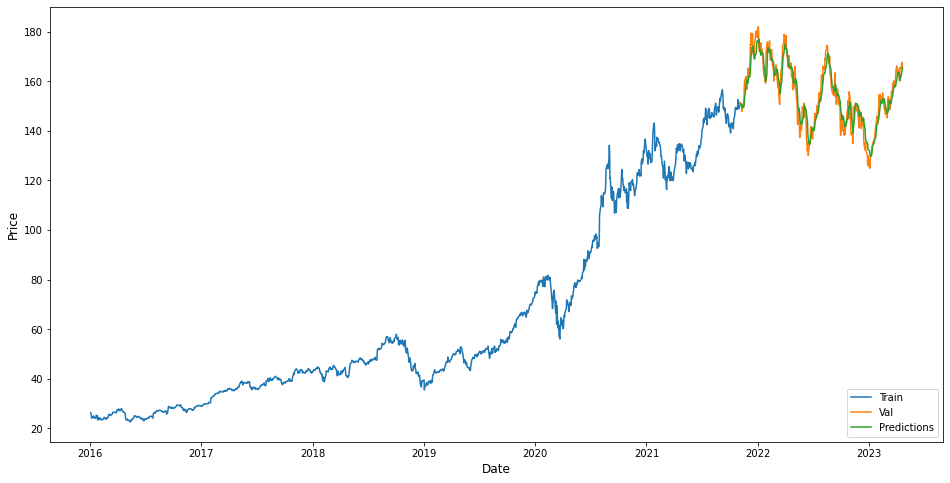

In [31]:
data = df.filter(['Close'])
train = data[:training_data_len]
test = data[training_data_len:]
test
test['Predictions'] = y_predicted

plt.figure(figsize = (16,8))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
# plt.plot(y_test, 'b', label="Original Price")
# plt.plot(y_predicted, 'r', label="Predicted Price")
# plt.legend()
plt.plot(train['Close'])
plt.plot(test[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()